# 1. Создаём свёрточную сеть любой структуры для решения задачи классификации цифр, например


In [5]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from keras.utils import to_categorical
from sklearn.metrics import classification_report

In [7]:
mnistdata=mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = mnistdata

In [9]:
print(len(train_images))
print(len(train_labels))
print(len(test_images))
print(len(test_labels))

60000
60000
10000
10000


In [11]:
train_images, test_images = train_images / 255.0, test_images / 255.0
train_images = train_images.reshape(train_images.shape[0],1,28,28)
test_images = test_images.reshape(test_images.shape[0],1,28,28)

In [13]:
train_labels_new=tf.keras.utils.to_categorical(train_labels,10)
test_labels_new=tf.keras.utils.to_categorical(test_labels,10)

In [15]:
model = keras.Sequential([keras.layers.InputLayer(input_shape = (1,28,28)),
                          keras.layers.Conv2D(32,(2,2), padding='same', activation='relu'),
                          keras.layers.MaxPooling2D(padding='same'),
                          keras.layers.Flatten(),
                          keras.layers.Dense(128,activation='relu'),
                          keras.layers.Dropout(0.25),
                          keras.layers.Dense(10, input_dim=300,activation='softmax')])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1, 28, 32)         3616      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 1, 14, 32)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 448)               0         
                                                                 
 dense (Dense)               (None, 128)               57472     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

# 2. Обучить и построить графики для метрики и функции потерь при обучении:

In [22]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_images,train_labels_new, epochs=15, batch_size=100, validation_split=0.2,verbose=1)

Epoch 1/15
480/480 [==============================] - 7s 4ms/step - loss: 0.4497 - accuracy: 0.8681 - val_loss: 0.1730 - val_accuracy: 0.9515
Epoch 2/15
480/480 [==============================] - 2s 4ms/step - loss: 0.1790 - accuracy: 0.9467 - val_loss: 0.1220 - val_accuracy: 0.9661
Epoch 3/15
480/480 [==============================] - 1s 3ms/step - loss: 0.1341 - accuracy: 0.9590 - val_loss: 0.1027 - val_accuracy: 0.9691
Epoch 4/15
480/480 [==============================] - 2s 3ms/step - loss: 0.1079 - accuracy: 0.9673 - val_loss: 0.0912 - val_accuracy: 0.9719
Epoch 5/15
480/480 [==============================] - 2s 3ms/step - loss: 0.0935 - accuracy: 0.9718 - val_loss: 0.0792 - val_accuracy: 0.9764
Epoch 6/15
480/480 [==============================] - 2s 3ms/step - loss: 0.0789 - accuracy: 0.9753 - val_loss: 0.0745 - val_accuracy: 0.9779
Epoch 7/15
480/480 [==============================] - 2s 3ms/step - loss: 0.0714 - accuracy: 0.9773 - val_loss: 0.0711 - val_accuracy: 0.9792
Epoch 

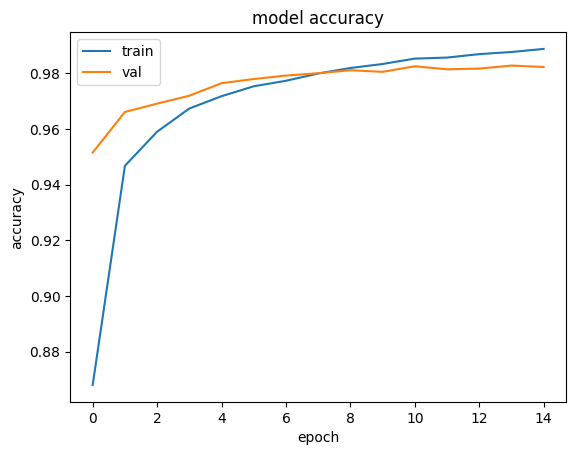

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

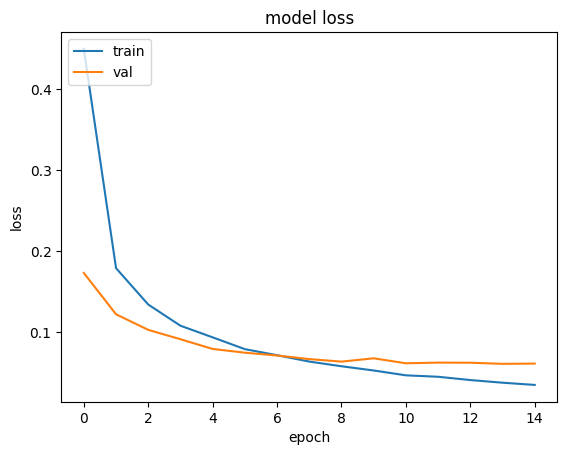

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [28]:
prediction1=model.predict(test_images)

313/313 [==============================] - 1s 1ms/step


# 3.  Постройте матрицу ошибок для тестируемого множества.

In [31]:
true_labels = np.argmax(test_labels_new, axis=1)
predicted_labels = np.argmax(prediction1, axis=1)


In [33]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(true_labels, predicted_labels)
conf_matrix

array([[ 973,    0,    0,    1,    0,    1,    2,    0,    2,    1],
       [   0, 1128,    4,    0,    0,    0,    2,    0,    1,    0],
       [   3,    1, 1016,    2,    2,    0,    0,    4,    4,    0],
       [   1,    0,    4,  994,    0,    4,    0,    4,    1,    2],
       [   1,    0,    2,    0,  971,    0,    4,    0,    0,    4],
       [   2,    1,    0,    8,    1,  872,    6,    0,    0,    2],
       [   2,    2,    0,    1,    1,    1,  949,    0,    2,    0],
       [   0,    6,    9,    3,    0,    0,    0, 1005,    1,    4],
       [   4,    1,    2,    2,    1,    4,    2,    4,  952,    2],
       [   1,    4,    0,    4,   11,    3,    1,    5,    5,  975]],
      dtype=int64)

In [35]:
results = np.argmax(prediction1, axis=1)

print(results)
pd.crosstab(test_labels, results)

[7 2 1 ... 4 5 6]


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,973,0,0,1,0,1,2,0,2,1
1,0,1128,4,0,0,0,2,0,1,0
2,3,1,1016,2,2,0,0,4,4,0
3,1,0,4,994,0,4,0,4,1,2
4,1,0,2,0,971,0,4,0,0,4
5,2,1,0,8,1,872,6,0,0,2
6,2,2,0,1,1,1,949,0,2,0
7,0,6,9,3,0,0,0,1005,1,4
8,4,1,2,2,1,4,2,4,952,2


# 4. Выведите значения разных метрик по каждому классу для детального анализа:

In [38]:
print(classification_report(test_labels, results))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       0.98      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



# 5. fashion_mnist

In [42]:
from keras.datasets import fashion_mnist

fashionmnistdata=fashion_mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = fashionmnistdata

In [44]:
from tensorflow.keras import layers
from tensorflow import keras

fashionmodel = keras.Sequential([
layers.InputLayer(input_shape=(1, 28,28)),
layers.Conv2D(32, (2, 2), padding='same', activation='relu'),
layers.MaxPooling2D(padding='same'),
layers.Conv2D(64, (2, 2), padding='same', activation='relu'),
layers.MaxPooling2D(padding='same'),
layers.Flatten(),
layers.Dense(128, activation='relu'),
layers.Dropout(0.25),
layers.Dense(64, activation='relu'),
layers.Dense(10, input_dim = 300, activation = 'softmax')
])

In [46]:
fashionmodel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 1, 28, 32)         3616      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 14, 32)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 14, 64)         8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 448)               0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [50]:
from tensorflow.keras.utils import to_categorical

train_images, test_images = train_images / 255.0, test_images / 255.0
train_images = train_images.reshape(train_images.shape[0],1,28,28)
test_images = test_images.reshape(test_images.shape[0],1,28,28)


train_labels_new=tf.keras.utils.to_categorical(train_labels,10)
test_labels_new=tf.keras.utils.to_categorical(test_labels,10)

In [52]:
fashionmodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=fashionmodel.fit(train_images,train_labels_new, epochs=25, batch_size=100, validation_split=0.2,verbose=1)

Epoch 1/25
480/480 [==============================] - 2s 4ms/step - loss: 0.6909 - accuracy: 0.7482 - val_loss: 0.4328 - val_accuracy: 0.8447
Epoch 2/25
480/480 [==============================] - 2s 4ms/step - loss: 0.4287 - accuracy: 0.8452 - val_loss: 0.3814 - val_accuracy: 0.8609
Epoch 3/25
480/480 [==============================] - 3s 6ms/step - loss: 0.3784 - accuracy: 0.8632 - val_loss: 0.3643 - val_accuracy: 0.8682
Epoch 4/25
480/480 [==============================] - 3s 6ms/step - loss: 0.3483 - accuracy: 0.8750 - val_loss: 0.3281 - val_accuracy: 0.8774
Epoch 5/25
480/480 [==============================] - 2s 3ms/step - loss: 0.3265 - accuracy: 0.8806 - val_loss: 0.3234 - val_accuracy: 0.8819
Epoch 6/25
480/480 [==============================] - 2s 4ms/step - loss: 0.3098 - accuracy: 0.8867 - val_loss: 0.3085 - val_accuracy: 0.8880
Epoch 7/25
480/480 [==============================] - 2s 4ms/step - loss: 0.2940 - accuracy: 0.8936 - val_loss: 0.3090 - val_accuracy: 0.8877
Epoch 

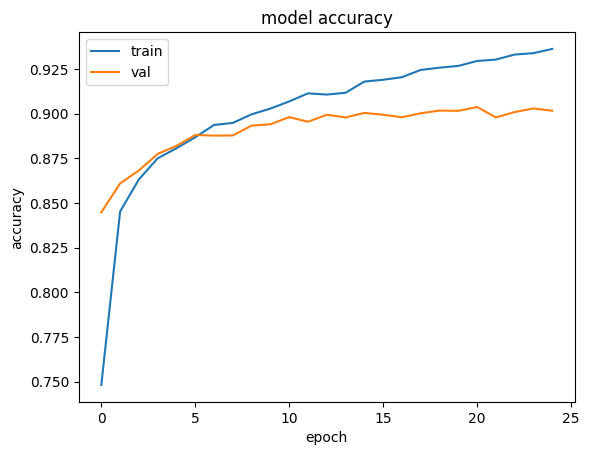

In [54]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

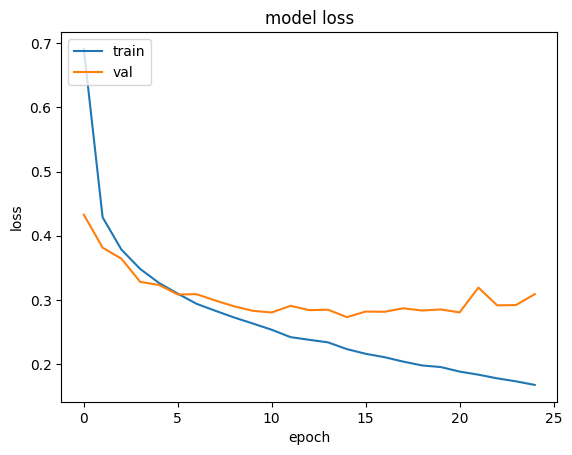

In [56]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [58]:
prediction1=fashionmodel.predict(test_images)

fashionresults = np.zeros(prediction1.shape[0])
n = 0
for v in prediction1:
    if max(v[0],v[1],v[2],v[3],v[4],v[5],v[5],v[6],v[7],v[8],v[9])==v[0]:
      fashionresults[n]=0
    elif max(v[0],v[1],v[2],v[3],v[4],v[5],v[5],v[6],v[7],v[8],v[9])==v[1]:
        fashionresults[n]=1
    elif max(v[0],v[1],v[2],v[3],v[4],v[5],v[5],v[6],v[7],v[8],v[9])==v[2]:
      fashionresults[n]=2
    elif max(v[0],v[1],v[2],v[3],v[4],v[5],v[5],v[6],v[7],v[8],v[9])==v[3]:
      fashionresults[n]=3
    elif max(v[0],v[1],v[2],v[3],v[4],v[5],v[5],v[6],v[7],v[8],v[9])==v[4]:
      fashionresults[n]=4
    elif max(v[0],v[1],v[2],v[3],v[4],v[5],v[5],v[6],v[7],v[8],v[9])==v[5]:
      fashionresults[n]=5
    elif max(v[0],v[1],v[2],v[3],v[4],v[5],v[5],v[6],v[7],v[8],v[9])==v[6]:
      fashionresults[n]=6
    elif max(v[0],v[1],v[2],v[3],v[4],v[5],v[5],v[6],v[7],v[8],v[9])==v[7]:
      fashionresults[n]=7
    elif max(v[0],v[1],v[2],v[3],v[4],v[5],v[5],v[6],v[7],v[8],v[9])==v[8]:
      fashionresults[n]=8
    elif max(v[0],v[1],v[2],v[3],v[4],v[5],v[5],v[6],v[7],v[8],v[9])==v[9]:
      fashionresults[n]=9
    n += 1

print(fashionresults)

pd.crosstab(test_labels, fashionresults)

313/313 [==============================] - 1s 2ms/step
[9. 2. 1. ... 8. 1. 5.]


col_0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
row_0,,,,,,,,,,
0,888,2,12,12,4,2,71,0,9,0
1,1,983,0,13,1,0,0,0,2,0
2,19,1,832,10,73,1,61,0,3,0
3,24,5,8,923,19,0,17,0,4,0
4,1,1,68,42,833,0,53,0,2,0
5,0,1,0,0,0,966,0,25,1,7
6,150,2,59,31,70,0,680,0,8,0
7,0,0,0,0,0,14,0,971,0,15
8,1,2,2,5,2,1,5,4,976,2


In [60]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, fashionresults))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.85      0.83      0.84      1000
           3       0.89      0.92      0.91      1000
           4       0.83      0.83      0.83      1000
           5       0.97      0.97      0.97      1000
           6       0.77      0.68      0.72      1000
           7       0.94      0.97      0.96      1000
           8       0.97      0.98      0.97      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [62]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [64]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets

# Создание модели
cifarmodel = keras.Sequential([
  layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
  layers.Conv2D(32, (3, 3), activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Dropout(0.25),
  layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(10, activation='softmax')
])

In [66]:
cifarmodel.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history=cifarmodel.fit(x_train, y_train, batch_size=32, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5131 - accuracy: 0.4496 - val_loss: 1.1432 - val_accuracy: 0.5947
Epoch 2/15
1563/1563 [==============================] - 10s 7ms/step - loss: 1.1039 - accuracy: 0.6093 - val_loss: 0.9120 - val_accuracy: 0.6816
Epoch 3/15
1563/1563 [==============================] - 10s 7ms/step - loss: 0.9414 - accuracy: 0.6681 - val_loss: 0.8255 - val_accuracy: 0.7173
Epoch 4/15
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8577 - accuracy: 0.6998 - val_loss: 0.7638 - val_accuracy: 0.7318
Epoch 5/15
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7987 - accuracy: 0.7207 - val_loss: 0.7625 - val_accuracy: 0.7360
Epoch 6/15
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7539 - accuracy: 0.7342 - val_loss: 0.7076 - val_accuracy: 0.7530
Epoch 7/15
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7203 - accuracy: 0.7492 - val_loss: 0.7011 - val_accur

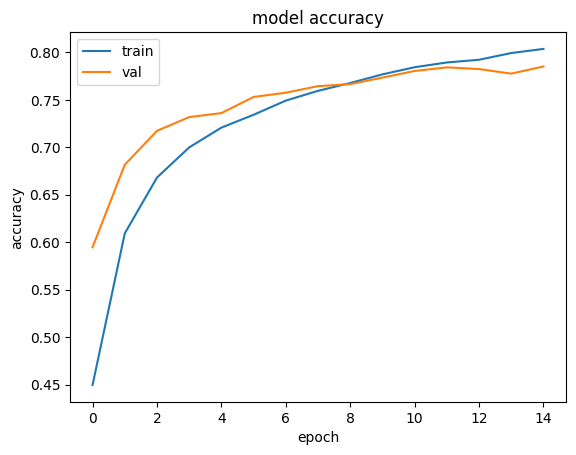

In [68]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

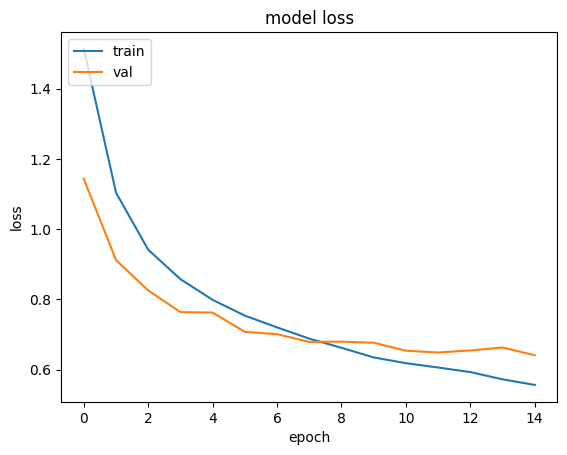

In [70]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

313/313 [==============================] - 1s 2ms/step


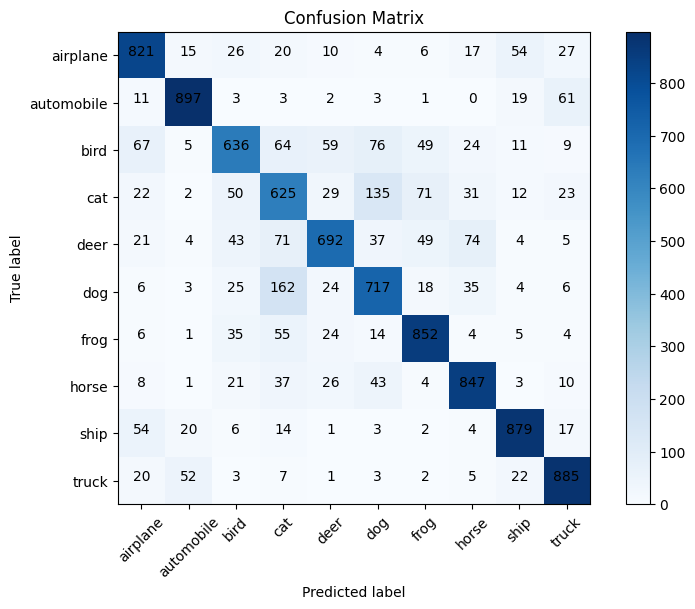

In [72]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_pred = np.argmax(cifarmodel.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title('Confusion Matrix')
plt.colorbar()

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

for i in range(10):
    for j in range(10):
        plt.text(j, i, cm[i, j], horizontalalignment='center', color='black')

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81      1000
           1       0.90      0.90      0.90      1000
           2       0.75      0.64      0.69      1000
           3       0.59      0.62      0.61      1000
           4       0.80      0.69      0.74      1000
           5       0.69      0.72      0.70      1000
           6       0.81      0.85      0.83      1000
           7       0.81      0.85      0.83      1000
           8       0.87      0.88      0.87      1000
           9       0.85      0.89      0.86      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.78     10000
weighted avg       0.79      0.79      0.78     10000

